# Power Iteration - convergence

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n=3

X = np.random.rand(n,n)
U,_ = sla.qr(X)
D = np.diag([5,3,1])
A = U@D@U.T
eigl, eigv = la.eig(A)

x0 = np.array([0,1,0])


## Power iteration

3.83839494637 4.8842935866
5.35416037308 4.99523220504
5.0660417292 4.99980642628
5.01297396146 4.99999130505
5.00255085439 4.99999930961
5.0004875887 4.99999984905
5.00008411631 4.99999994956
5.00000878796 4.999999982
[ 0.29811029 -0.3048888   0.18647408  0.19645097  0.19661338  0.19114721
  0.17251489  0.10447396]


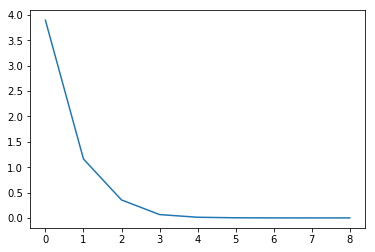

In [12]:
#Power iteration to get largest eigenvalue
nrm = la.norm(x0,np.inf)
x = x0/nrm
eigs = [nrm]
diff = 1
count = 0
while (diff > 1e-4 and count < 100):
    count += 1
    x = A@x #xk+1 = A xk
    nrm = la.norm(x,np.inf)
    x = x/nrm
    Rayl = x.T@A@x/(x.T@x)
    print(nrm,Rayl)
    diff = np.abs(eigs[-1]-nrm)
    eigs.append(nrm)

eigs = np.array(eigs)
error = eigs - (5)
plt.plot(np.abs(error)) 
print(error[1:]/error[:-1])


## Rayleigh Quotient Iteration

4.99485277603
4.99999999076
5.0


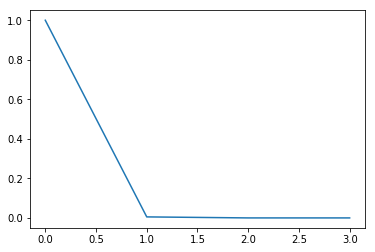

In [13]:
#Rayleigh Quotient iteration
x0 =  np.random.randn(n)
x = x0/la.norm(x0)
Rayl = 6
eigs = [Rayl]
diff = 1
while diff > 1e-4:
    
    P, L, U = sla.lu(A-Rayl*np.eye(n))
    y = sla.solve_triangular(L, np.dot(P.T, x), lower=True)
    x = sla.solve_triangular(U, y)    
    x = x/la.norm(x)
    Rayl = x.T@A@x/(x.T@x)
    diff = np.abs(eigs[-1]-Rayl)
    eigs.append(Rayl)
    print(Rayl)
    
eigs = np.array(eigs)
errorR = eigs - (5)
plt.plot(np.abs(errorR)) 

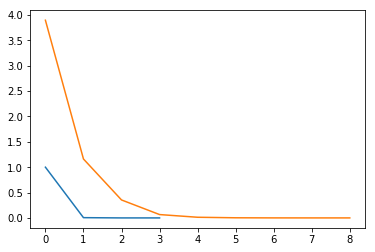

In [14]:
plt.plot(np.abs(errorR)) 
plt.plot(np.abs(error)) 